A reminder for the questions:

Q1: How many hours per day do you spend on social media?

Q2: How do you feel being the center of attention

Q3: Working while being observed

Q4: Talking face to face with someone you don't know very well

Q5: Expressing disagreement or disapproval to someone you don't know very well

Q6: Are you extremely conscious of your actions when in social settings because you fear they might offend someone or you could be rejected?

Q7: Do you feel anxious or panicky before social situations?

Scale:

1- very comfortable 

2- comfortable 

3 - neutral 

4 - uncomfortable

5 - very uncomfortable

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#First I need to open the file and see how the data frame is presented in the note book. 
df = pd.read_csv (r'Social_Anxiety_Survey_Master.csv')
df

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/31/2019 16:11:56,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2
62,12/31/2019 16:12:42,Male,Yes,20 or below,Single,Less than 4 hours per day,3,2,5,3,1,4
63,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1
64,1/1/2020 15:15,Male,Yes,21 - 30,Single,Less than 3 hours per day,2,4,4,4,4,4


In [3]:
#must change the Q1 into numbers to represent the number of hours they are online
df['Q1'] = df['Q1'].replace(
    ['Less than 1 hours per day','Less than 2 hours per day','Less than 3 hours per day',
     'Less than 4 hours per day','4 hours and above per day' ],
    [1, 2, 3, 4, 5])

df

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,4,3,3,3,3,4,1
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,2,3,3,2,2,4,4
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,5,1,5,2,4,5,4
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,1,4,4,3,3,3,1
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,1,3,5,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/31/2019 16:11:56,Male,Yes,20 or below,Single,3,4,5,4,5,4,2
62,12/31/2019 16:12:42,Male,Yes,20 or below,Single,4,3,2,5,3,1,4
63,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,5,1,1,1,4,5,1
64,1/1/2020 15:15,Male,Yes,21 - 30,Single,3,2,4,4,4,4,4


First inquiry is how is online more per gender

In [4]:
#gropu the data by gender to see the how many males and females there are
gender_countdf = df.groupby(['Gender']).count()

 #pick any column to keep since its it just count
gender_countdf = gender_countdf[['Age']] 

#Rename column to Frequency 
gender_countdf = gender_countdf.rename(columns={'Age': 'Frequency'})

gender_countdf

#What am I looking at: amount of males and females in the study

,Frequency
Gender,
Female,39
Male,27


In [5]:
#group the data by gender and # of hours
gender_timespentdf = df.groupby(['Gender', 'Q1'])              

#find the frequency of each number of hours
gender_timespentdf = gender_timespentdf.count()   

#pick any column to keep since its it just count
gender_timespentdf = gender_timespentdf[['Age']] 

#Rename column to Frequency 
gender_timespentdf = gender_timespentdf.rename(columns={'Age': 'Frequency'})

gender_timespentdf

# What am I looking at: a chart showing how many ppl are online for how many hours grouped by gender 

Frequency
Gender Q1           
Female 1           5
       2           4
       3           6
       4           6
       5          18
Male   1           4
       2           4
       3           6
       4           3
       5          10

Text(0.5, 0.98, '')

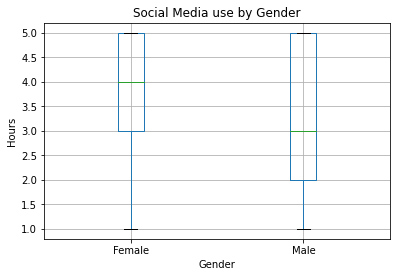

In [6]:
# create a box plot showing distribution by gender and hours
# Q1: How many hours per day do you spend on social media?

df_bp = df[['Gender', 'Q1']]
df_bp.boxplot(by = 'Gender', column = 'Q1')

plt.title('Social Media use by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours')
plt.suptitle('')
# What am I looking at: distribution of hours online grouped by male and female

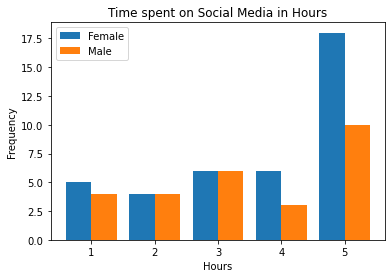

In [7]:
#creat a bar graph showing frequency
 
timespent_list = gender_timespentdf.values.tolist()         #creating a list of all the frequencies

flat_list = []                                              #flattening the list of lists
for sublist in timespent_list:
    for item in sublist:
        flat_list.append(item)

f_timespent = flat_list[0:5]                                 #slicing the list into male and female                 
m_timespent = flat_list[5:]


X = ['1','2','3','4','5']                                    #X axis titles

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, f_timespent, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, m_timespent, 0.4, label = 'Male')
  
plt.xticks(X_axis, X)
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Time spent on Social Media in Hours")
plt.legend()
plt.show()

# What am I looking at: the frequency of people grouped by number of hours they are online, each bar represents a 
#                       gender

Second lets break this down more into age, gender and social media usage

In [8]:
#group the data by gender, age, and # of hours
gender_age_timedf = df.groupby(['Gender', 'Age','Q1'])       

#find the frequency of each # of hours, include # of hours that the frequency is zero
gender_age_timedf =gender_age_timedf.count().unstack(fill_value = 0).stack()  

#pick any column to keep since its it just count
gender_age_timedf = gender_age_timedf[['Student']]                    

#rename column 
gender_age_timedf = gender_age_timedf.rename(columns={'Student': 'Frequency'})

gender_age_timedf

# What am I looking at: The number of hours ppl are online grouped by gender and age group 

Frequency
Gender Age         Q1           
Female 20 or below 1           0
                   2           0
                   3           1
                   4           0
                   5           2
       21 - 30     1           3
                   2           1
                   3           1
                   4           4
                   5          14
       31 - 40     1           2
                   2           3
                   3           4
                   4           2
                   5           2
Male   20 or below 1           0
                   2           0
                   3           1
                   4           1
                   5           1
       21 - 30     1           1
                   2           3
                   3           5
                   4           1
                   5           6
       31 - 40     1           3
                   2           1
                   3           0
                   4           1
                   5           3

Graph for FEMALES by age group and the number of hours they are online

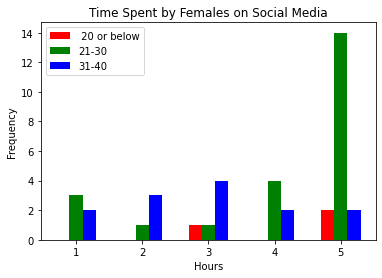

In [9]:
#create a df from the above with only females 
femaledf = gender_age_timedf.loc['Female']

#create a list of the frequencies --> creates a list of lists
timespent_list = femaledf.values.tolist()        

#flattening the list of lists
flat_list = []  
for sublist in timespent_list:
    for item in sublist:
        flat_list.append(item)

        
N = 5
ind = np.arange(N)
width = 0.2
        
# Creating the differnet categories/bars
f_20below = flat_list[0:5]
bar1 = plt.bar(ind, f_20below, width, color = 'r')
                 
f_21to30 = flat_list[5:10]
bar2 = plt.bar(ind+width, f_21to30, width, color='g')

f_31to40 = flat_list[10:]
bar3 = plt.bar(ind+width*2, f_31to40, width, color = 'b')

#table specifics
plt.xlabel("Hours")
plt.ylabel('Frequency')
plt.title("Time Spent by Females on Social Media")
  
plt.xticks(ind+width,['1', '2', '3', '4', '5'])
plt.legend( (bar1, bar2, bar3), (' 20 or below', '21-30', '31-40') )
plt.show()

# What am I looking at: the amount of females who are online for a number of hours in each age group

Graph for MALES by age group and the number of hours they are online

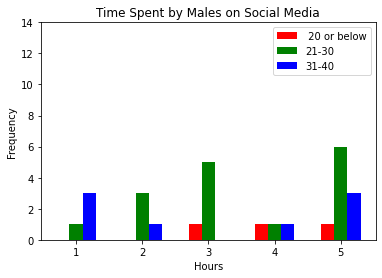

In [10]:
# create a df of # of hours males are online per age group
maledf = gender_age_timedf.loc['Male']

# take all the frequencies and make it a list --> becomes a list of lists
timespent_list = maledf.values.tolist()        

# flattening the list of lists
flat_list = []                                              
for sublist in timespent_list:
    for item in sublist:
        flat_list.append(item)

        
N = 5
ind = np.arange(N)
width = 0.2
        
#create the difference groups/bars for the graph
m_20below = flat_list[0:5]
bar1 = plt.bar(ind, m_20below, width, color = 'r')
                 
m_21to30 = flat_list[5:10]
bar2 = plt.bar(ind+width, m_21to30, width, color='g')

m_31to40 = flat_list[10:]
bar3 = plt.bar(ind+width*2, m_31to40, width, color = 'b')

# Graph Specifics
plt.xlabel("Hours")
plt.ylabel('Frequency')
plt.title("Time Spent by Males on Social Media")
  
plt.xticks(ind+width,['1', '2', '3', '4', '5'])
plt.legend( (bar1, bar2, bar3), (' 20 or below', '21-30', '31-40') )

#change y axis limits to match the female chart
ax = plt.gca()
ax.set_ylim([0, 14])

plt.show()

# What am I looking at: the amount of males who are online for a certain # of hours

How are anxiety levels when speaking with strangers?
        
    Q4: Talking face to face with someone you don't know very well

    Q5: Expressing disagreement or disapproval to someone you don't know very well

Show on a scatter plot people's anxiety when speaking to strangers & disagreeing with them

Text(0.5, 1.0, 'Speaking Face to Face')

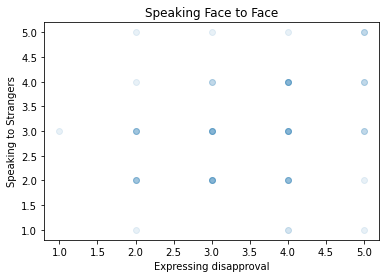

In [11]:
plt.scatter(df['Q5'], df['Q4'], alpha = .1)
plt.xlabel('Expressing disapproval')
plt.ylabel('Speaking to Strangers')

plt.title('Speaking Face to Face')

# Observations: not a true correlation, but most people feel neutral or uncomfortable by the situation
#               could say there is a slight positive correlation as the darker dots are diagonal and to the right 

Box plot showing anxiety distribution by gender and face to face communication 

Text(0.5, 0.98, '')

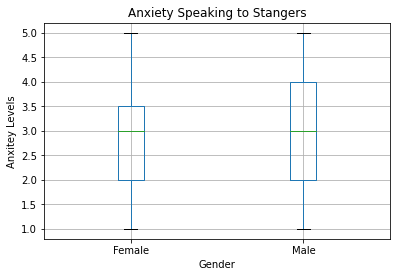

In [12]:
q4_bp = df[['Gender', 'Q4']]
q4_bp.boxplot(by = 'Gender', column = 'Q4')

plt.title('Anxiety Speaking to Stangers')
plt.xlabel('Gender')
plt.ylabel('Anxitey Levels')
plt.suptitle('')
# ovservation: even though the mean is the same between males and females, females are generally more comfortable 
#              face to face with strangers 

Box plot showing anxiety when expressing disagreement with someone you don't know

Text(0.5, 0.98, '')

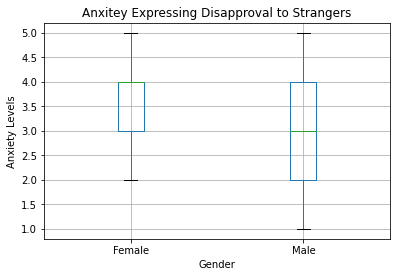

In [13]:
q5_bp = df[['Gender', 'Q5']]
q5_bp.boxplot(by = 'Gender', column = 'Q5')

plt.title('Anxitey Expressing Disapproval to Strangers')
plt.xlabel('Gender')
plt.ylabel('Anxiety Levels')
plt.suptitle('')
# Observations: Males are mostely indifferent 
#               Female anxiety shot up from just speaking to now potenially being offensive 

Does people's anxiety get better over time? 

    --> show this by age groups and gender 
    
Find general anxiety levels by taking the mean of all the questions dealing rating with anxiety levels 

    Q2: How do you feel being the center of attention
    
    Q3: Working while being observed
    
    Q4: Talking face to face with someone you don't know very well
    
    Q5: Expressing disagreement or disapproval to someone you don't know very well
    
    Q6: Are you extremely conscious of your actions when in social settings because you fear they might offend someone or          you could be rejected?
    
    Q7: Do you feel anxious or panicky before social situations?


In [14]:
#make a new df from the original df
anxiety_levelsdf = df.copy()

#create a new column called mean by taking the mean value of Q2-Q7 and round to 3 decimal points
anxiety_levelsdf['Mean'] = anxiety_levelsdf.loc[:, 'Q2':'Q7'].mean(axis = 1).round(decimals = 3)   

anxiety_levelsdf

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Mean
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,4,3,3,3,3,4,1,2.833
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,2,3,3,2,2,4,4,3.000
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,5,1,5,2,4,5,4,3.500
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,1,4,4,3,3,3,1,3.000
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,1,3,5,2,3,4,4,3.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/31/2019 16:11:56,Male,Yes,20 or below,Single,3,4,5,4,5,4,2,4.000
62,12/31/2019 16:12:42,Male,Yes,20 or below,Single,4,3,2,5,3,1,4,3.000
63,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,5,1,1,1,4,5,1,2.167
64,1/1/2020 15:15,Male,Yes,21 - 30,Single,3,2,4,4,4,4,4,3.667


Graphs displaying the mean anxiety levels for EVERYONE

Text(0, 0.5, 'Frequency')

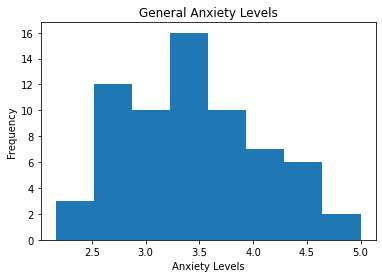

In [15]:
plt.hist(anxiety_levelsdf['Mean'], bins = 8) #mean anxiety for everyone

plt.title('General Anxiety Levels')
plt.xlabel('Anxiety Levels')
plt.ylabel('Frequency')

# Observations: there is a right skew -- most people feel anxious 

Text(0.5, 1.0, 'Social Media use vs. General Anxiety Levels')

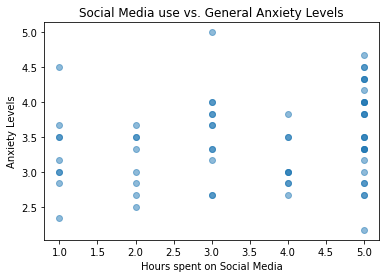

In [16]:
plt.scatter(anxiety_levelsdf['Q1'], anxiety_levelsdf['Mean'], alpha = 0.5)
plt.xlabel('Hours spent on Social Media')
plt.ylabel('Anxiety Levels')
plt.title('Social Media use vs. General Anxiety Levels')

# Observations: based onthe hue of the dots most people are in the 3.5-4.0 range 
#               as ppl are on online more they have higher darker dots  --> positive correlation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(20.799999999999997, 0.5, 'General Anxiety Levels')

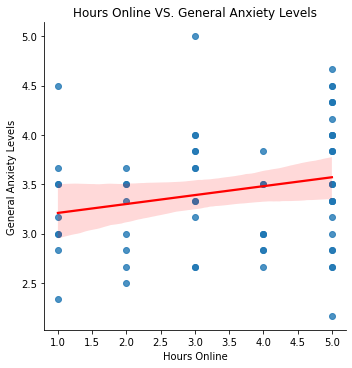

In [17]:
sns.lmplot("Q1", "Mean", anxiety_levelsdf, line_kws={'color': 'red'})

plt.title('Hours Online VS. General Anxiety Levels')
plt.xlabel('Hours Online')
plt.ylabel('General Anxiety Levels')

#Observation: even thoough the graph has scattered points, this supports positive correlation between hours online 
#             and social anxiety

Graphs showing the general anxiety levels for FEMALES

In [18]:
f_anxiety = anxiety_levelsdf.loc[anxiety_levelsdf['Gender'] == 'Female']

f_anxiety

# What am I looking at: the df of only females and their responses

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Mean
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,4,3,3,3,3,4,1,2.833
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,5,1,5,2,4,5,4,3.500
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,1,4,4,3,3,3,1,3.000
5,12/12/2019 21:47,Female,Yes,21 - 30,Single,2,2,5,2,3,3,2,2.833
6,12/12/2019 21:52,Female,Yes,31 - 40,Married,2,2,4,3,3,2,1,2.500
7,12/12/2019 22:38,Female,Yes,21 - 30,Single,5,4,4,3,5,5,3,4.000
8,12/13/2019 7:19:36,Female,Yes,21 - 30,Single,5,5,4,3,4,4,4,4.000
10,12/13/2019 21:49:17,Female,Yes,21 - 30,Single,5,5,5,3,5,4,3,4.167
11,12/13/2019 21:49:35,Female,Yes,20 or below,Single,3,4,4,4,2,3,3,3.333
12,12/16/2019 8:46:54,Female,Yes,21 - 30,Single,5,3,5,2,4,5,5,4.000


Text(0, 0.5, 'Anxiety Levels')

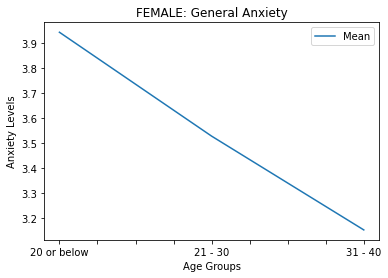

In [19]:
f_anxiety.groupby('Age').mean().plot(y='Mean', use_index=True)

plt.title('FEMALE: General Anxiety')
plt.xlabel('Age Groups')
plt.ylabel('Anxiety Levels')


# What am I looking at: The mean anxitey for each age group over time

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(1.0, 5.0)

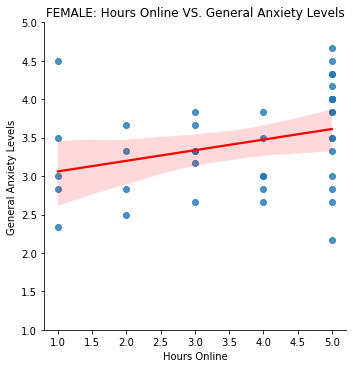

In [20]:
sns.lmplot("Q1", "Mean", f_anxiety, line_kws={'color': 'red'})

plt.title('FEMALE: Hours Online VS. General Anxiety Levels')
plt.xlabel('Hours Online')
plt.ylabel('General Anxiety Levels')

plt.ylim([1.0, 5.0])

Text(0, 0.5, 'Frequency')

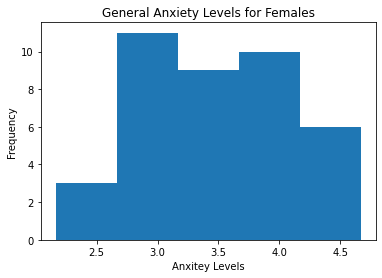

In [21]:
plt.hist(f_anxiety['Mean'], bins = 5) 

plt.title('General Anxiety Levels for Females')
plt.xlabel('Anxitey Levels')
plt.ylabel('Frequency')

# What am I looking at: a histogram of # of females and their average anxiety 
# Observation: right skewed

Text(0.5, 0.98, '')

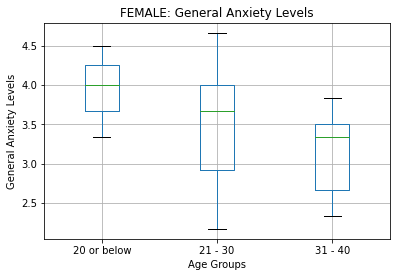

In [22]:
f_anxiety_bp = f_anxiety[['Age', 'Mean']]                                         
f_anxiety_bp.boxplot(by = 'Age', column = 'Mean')

plt.title('FEMALE: General Anxiety Levels')
plt.xlabel('Age Groups')
plt.ylabel('General Anxiety Levels')
plt.suptitle('')
# What am I looking at: distribution of female anxiety across age groups

Graphs showing the general anxiety levels for MALES

In [23]:
m_anxiety = anxiety_levelsdf.loc[anxiety_levelsdf['Gender'] == 'Male'] 

m_anxiety

# What am I looking at: all of the males in the data 

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Mean
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,2,3,3,2,2,4,4,3.000
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,1,3,5,2,3,4,4,3.500
9,12/13/2019 12:10:15,Male,Yes,21 - 30,Single,5,2,5,3,2,5,2,3.167
17,12/28/2019 0:24:46,Male,Yes,21 - 30,Single,3,5,5,5,5,5,5,5.000
18,12/28/2019 0:38:15,Male,Yes,21 - 30,Single,4,3,5,3,2,4,4,3.500
20,12/28/2019 9:36:24,Male,Yes,31 - 40,Married,5,4,4,2,2,3,1,2.667
23,12/28/2019 11:14:29,Male,Yes,31 - 40,Single,1,4,2,4,4,4,4,3.667
24,12/28/2019 12:54:20,Male,Yes,31 - 40,Married,5,3,3,2,3,3,3,2.833
25,12/28/2019 14:09:57,Male,Yes,21 - 30,Single,5,2,4,3,5,4,3,3.500
26,12/30/2019 9:16:58,Male,Yes,21 - 30,Single,5,3,3,3,2,4,5,3.333


Text(0, 0.5, 'General Anxiety Levels')

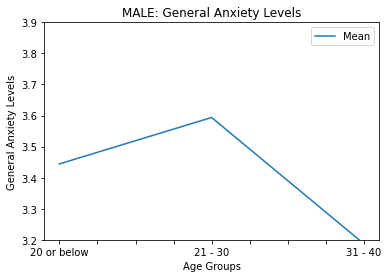

In [24]:
m_anxiety.groupby('Age').mean().plot(y='Mean', use_index=True)

plt.ylim(3.2,3.9)
plt.title('MALE: General Anxiety Levels')
plt.xlabel('Age Groups')
plt.ylabel('General Anxiety Levels')

#what am I looking at: mean level of anxiety across age groups for men, scale adjusted to match females 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(1.0, 5.0)

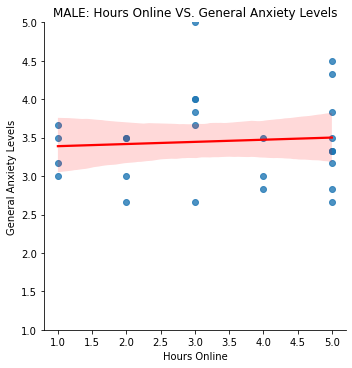

In [25]:
sns.lmplot("Q1", "Mean", m_anxiety, line_kws={'color': 'red'})

plt.title('MALE: Hours Online VS. General Anxiety Levels')
plt.xlabel('Hours Online')
plt.ylabel('General Anxiety Levels')

plt.ylim([1.0, 5.0])

Text(0, 0.5, 'Frequency')

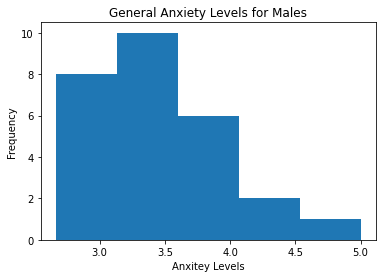

In [26]:
plt.hist(m_anxiety['Mean'], bins = 5) 

plt.title('General Anxiety Levels for Males')
plt.xlabel('Anxitey Levels')
plt.ylabel('Frequency')

# What am I looking at: a histogram of # of females and their average anxiety 
# Observation: right skewed

Text(0.5, 0.98, '')

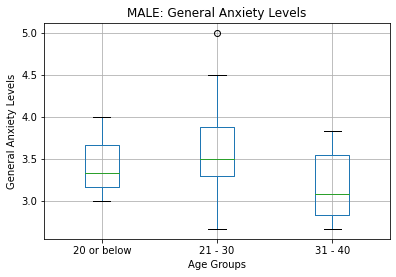

In [27]:
m_anxiety_bp = m_anxiety[['Age', 'Mean']]                                         #male anxiety over ages
m_anxiety_bp.boxplot(by = 'Age', column = 'Mean')

plt.title('MALE: General Anxiety Levels')
plt.xlabel('Age Groups')
plt.ylabel('General Anxiety Levels')
plt.suptitle('')
# What am I looking at: distibution of anxiety levels across ages 

Is there a correlation to before and during social events? 

Questions about anxiety levels beforehand: 

    Q7: Do you feel anxious or panicky before social situations?
    
    Q2: How do you feel being the center of attention

In [28]:
anxiety_changes = anxiety_levelsdf.copy()

anxiety_changes['Anxiety Before'] = anxiety_changes.loc[:, ['Q2', 'Q7']].mean(axis = 1).round(decimals = 3)    

anxiety_changes['Anxiety During'] = anxiety_changes.loc[:, 'Q3':'Q6'].mean(axis = 1).round(decimals = 3)

anxiety_changes

# What am I looking at: Adding two columns taking the average of the anxiety before and during events

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Mean,Anxiety Before,Anxiety During
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,4,3,3,3,3,4,1,2.833,2.0,3.25
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,2,3,3,2,2,4,4,3.000,3.5,2.75
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,5,1,5,2,4,5,4,3.500,2.5,4.00
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,1,4,4,3,3,3,1,3.000,2.5,3.25
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,1,3,5,2,3,4,4,3.500,3.5,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/31/2019 16:11:56,Male,Yes,20 or below,Single,3,4,5,4,5,4,2,4.000,3.0,4.50
62,12/31/2019 16:12:42,Male,Yes,20 or below,Single,4,3,2,5,3,1,4,3.000,3.5,2.75
63,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,5,1,1,1,4,5,1,2.167,1.0,2.75
64,1/1/2020 15:15,Male,Yes,21 - 30,Single,3,2,4,4,4,4,4,3.667,3.0,4.00


In [29]:
#group the data by gender, age and anxitey beforehand
gender_beforedf = anxiety_changes.groupby(['Gender', 'Age','Anxiety Before'])          

#find the frequency of each anxitey rating
gender_beforedf = gender_beforedf.count().unstack(fill_value = 0).stack()  

#pick any column to keep since its it just count
gender_beforedf = gender_beforedf[['Student']]                       

gender_beforedf = gender_beforedf.rename(columns={'Student': 'Frequency'})

gender_beforedf

Frequency
Gender Age         Anxiety Before           
Female 20 or below 1.0                     0
                   1.5                     0
                   2.0                     0
                   2.5                     0
                   3.0                     0
                   3.5                     1
                   4.0                     0
                   4.5                     2
                   5.0                     0
       21 - 30     1.0                     1
                   1.5                     0
                   2.0                     3
                   2.5                     3
                   3.0                     4
                   3.5                     4
                   4.0                     6
                   4.5                     1
                   5.0                     1
       31 - 40     1.0                     0
                   1.5                     1
                   2.0                     2
                   2.5                     1
                   3.0                     4
                   3.5                     3
                   4.0                     1
                   4.5                     1
                   5.0                     0
Male   20 or below 1.0                     0
                   1.5                     0
                   2.0                     0
                   2.5                     0
                   3.0                     1
                   3.5                     1
                   4.0                     1
                   4.5                     0
                   5.0                     0
       21 - 30     1.0                     0
                   1.5                     0
                   2.0                     1
                   2.5                     3
                   3.0                     3
                   3.5                     5
                   4.0                     1
                   4.5                     2
                   5.0                     1
       31 - 40     1.0                     0
                   1.5                     0
                   2.0                     1
                   2.5                     3
                   3.0                     1
                   3.5                     1
                   4.0                     2
                   4.5                     0
                   5.0                     0

Text(0.5, 0.98, '')

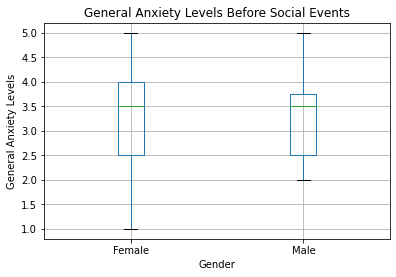

In [30]:
gen_anxiety_before_bp = anxiety_changes[['Gender', 'Anxiety Before']]                                        
gen_anxiety_before_bp.boxplot(by = 'Gender', column = 'Anxiety Before')

plt.title('General Anxiety Levels Before Social Events')
plt.xlabel('Gender')
plt.ylabel('General Anxiety Levels')
plt.suptitle('')
# What am I looking at: distribution of anxiety before social events

In [31]:
f_changesdf = anxiety_changes.loc[anxiety_levelsdf['Gender'] == 'Female']

f_changesdf

#What am I looking at: df of all females with both anxiety ratings before and during 

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Mean,Anxiety Before,Anxiety During
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,4,3,3,3,3,4,1,2.833,2.0,3.25
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,5,1,5,2,4,5,4,3.500,2.5,4.00
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,1,4,4,3,3,3,1,3.000,2.5,3.25
5,12/12/2019 21:47,Female,Yes,21 - 30,Single,2,2,5,2,3,3,2,2.833,2.0,3.25
6,12/12/2019 21:52,Female,Yes,31 - 40,Married,2,2,4,3,3,2,1,2.500,1.5,3.00
7,12/12/2019 22:38,Female,Yes,21 - 30,Single,5,4,4,3,5,5,3,4.000,3.5,4.25
8,12/13/2019 7:19:36,Female,Yes,21 - 30,Single,5,5,4,3,4,4,4,4.000,4.5,3.75
10,12/13/2019 21:49:17,Female,Yes,21 - 30,Single,5,5,5,3,5,4,3,4.167,4.0,4.25
11,12/13/2019 21:49:35,Female,Yes,20 or below,Single,3,4,4,4,2,3,3,3.333,3.5,3.25
12,12/16/2019 8:46:54,Female,Yes,21 - 30,Single,5,3,5,2,4,5,5,4.000,4.0,4.00


In [32]:
m_changesdf = anxiety_changes.loc[anxiety_levelsdf['Gender'] == 'Male']

m_changesdf

#What am I looking at: df of all males with both anxiety ratings before and during 

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Mean,Anxiety Before,Anxiety During
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,2,3,3,2,2,4,4,3.000,3.5,2.75
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,1,3,5,2,3,4,4,3.500,3.5,3.50
9,12/13/2019 12:10:15,Male,Yes,21 - 30,Single,5,2,5,3,2,5,2,3.167,2.0,3.75
17,12/28/2019 0:24:46,Male,Yes,21 - 30,Single,3,5,5,5,5,5,5,5.000,5.0,5.00
18,12/28/2019 0:38:15,Male,Yes,21 - 30,Single,4,3,5,3,2,4,4,3.500,3.5,3.50
20,12/28/2019 9:36:24,Male,Yes,31 - 40,Married,5,4,4,2,2,3,1,2.667,2.5,2.75
23,12/28/2019 11:14:29,Male,Yes,31 - 40,Single,1,4,2,4,4,4,4,3.667,4.0,3.50
24,12/28/2019 12:54:20,Male,Yes,31 - 40,Married,5,3,3,2,3,3,3,2.833,3.0,2.75
25,12/28/2019 14:09:57,Male,Yes,21 - 30,Single,5,2,4,3,5,4,3,3.500,2.5,4.00
26,12/30/2019 9:16:58,Male,Yes,21 - 30,Single,5,3,3,3,2,4,5,3.333,4.0,3.00


Graphs of anxitey level BEFORE social events for FEMALES

In [33]:
female_beforedf = f_changesdf[['Age', 'Anxiety Before', 'Student']]

female_beforedf = female_beforedf.groupby(['Age', 'Anxiety Before']).count().unstack(fill_value = 0).stack()

female_beforedf

Student
Age         Anxiety Before         
20 or below 1.0                   0
            1.5                   0
            2.0                   0
            2.5                   0
            3.0                   0
            3.5                   1
            4.0                   0
            4.5                   2
            5.0                   0
21 - 30     1.0                   1
            1.5                   0
            2.0                   3
            2.5                   3
            3.0                   4
            3.5                   4
            4.0                   6
            4.5                   1
            5.0                   1
31 - 40     1.0                   0
            1.5                   1
            2.0                   2
            2.5                   1
            3.0                   4
            3.5                   3
            4.0                   1
            4.5                   1
            5.0                   0

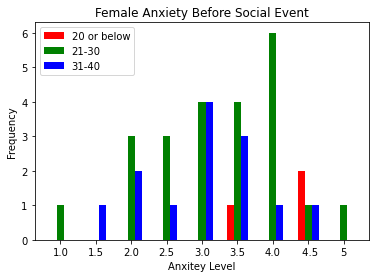

In [34]:
#create a bar graph showing frequency of females anxiety before

#list out all the values
timespent_list1 = female_beforedf.values.tolist()         
 
flat_list1 = []                                            
for sublist in timespent_list1:
    for item in sublist:
        flat_list1.append(item)

#changing list of ints into list of strs
flat_list1 = list(map(int, flat_list1))

N = 9
ind = np.arange(N)
width = 0.2
        
#creating the categories for each age group
f1_20below = flat_list1[0:9]
bar1 = plt.bar(ind, f1_20below, width, color = 'r')
                 
f1_21to30 = flat_list1[9:18]
bar2 = plt.bar(ind+width, f1_21to30, width, color='g')

f1_31to40 = flat_list1[18:]
bar3 = plt.bar(ind+width*2, f1_31to40, width, color = 'b')

plt.xlabel("Anxitey Level")
plt.ylabel('Frequency')
plt.title("Female Anxiety Before Social Event")
  
plt.xticks(ind+width,['1.0', '1.5','2.0','2.5', '3.0', '3.5', '4.0', ' 4.5', '5'])
plt.legend( (bar1, bar2, bar3), ('20 or below', '21-30', '31-40') )

plt.show()

Text(0.5, 0.98, '')

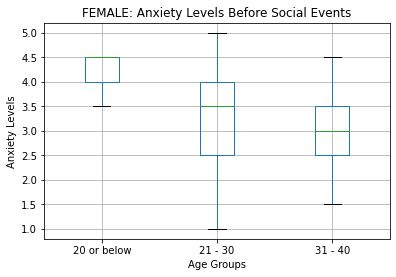

In [35]:
f_anxiety_before_bp = f_changesdf[['Age', 'Anxiety Before']]                                         
f_anxiety_before_bp.boxplot(by = 'Age', column = 'Anxiety Before')

plt.title('FEMALE: Anxiety Levels Before Social Events')
plt.xlabel('Age Groups')
plt.ylabel('Anxiety Levels')
plt.suptitle('')

Graphs of anxitey level BEFORE social events for MALES

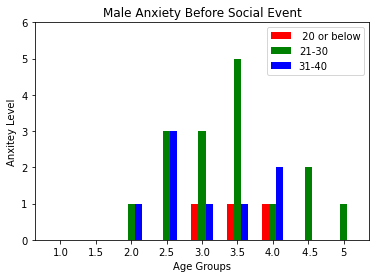

In [36]:
#creat a bar graph showing frequency of males anxiety before
 
male_beforedf = gender_beforedf.loc['Male']

timespent_list = male_beforedf.values.tolist()         #creating a list of all the frequencies

flat_list = []                                              #flattening the list of lists
for sublist in timespent_list:
    for item in sublist:
        flat_list.append(item)

N = 9
ind = np.arange(N)
width = 0.2
        
        
m1_20below = flat_list[0:9]
bar1 = plt.bar(ind, m1_20below, width, color = 'r')
                 
m1_21to30 = flat_list[9:18]
bar2 = plt.bar(ind+width, m1_21to30, width, color='g')

m1_31to40 = flat_list[18:]
bar3 = plt.bar(ind+width*2, m1_31to40, width, color = 'b')

plt.xlabel("Age Groups")
plt.ylabel('Anxitey Level')
plt.title("Male Anxiety Before Social Event")
  
plt.xticks(ind+width,['1.0', '1.5','2.0','2.5', '3.0', '3.5', '4.0', ' 4.5', '5'])
plt.legend( (bar1, bar2, bar3), (' 20 or below', '21-30', '31-40') )

plt.ylim([0, 6])

plt.show()

(1.0, 5.0)

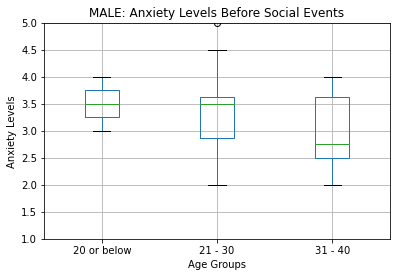

In [37]:
m_anxiety_before_bp = m_changesdf[['Age', 'Anxiety Before']]                                         
m_anxiety_before_bp.boxplot(by = 'Age', column = 'Anxiety Before')

plt.title('MALE: Anxiety Levels Before Social Events')
plt.xlabel('Age Groups')
plt.ylabel('Anxiety Levels')
plt.suptitle('')

plt.ylim([1.0, 5.0])

Questions about anxiety levels during: 

    Q3: Working while being observed
    
    Q4: Talking face to face with someone you don't know very well
    
    Q5: Expressing disagreement or disapproval to someone you don't know very well
    
    Q6: Are you extremely conscious of your actions when in social settings because you fear they might offend someone or          you could be rejected?

Text(0.5, 0.98, '')

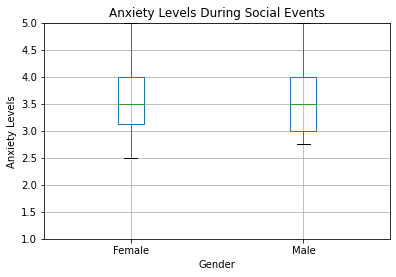

In [38]:
gen_anxiety_during_bp = anxiety_changes[['Gender', 'Anxiety During']]                                        
gen_anxiety_during_bp.boxplot(by = 'Gender', column = 'Anxiety During')

plt.ylim([1.0, 5.0])

plt.title('Anxiety Levels During Social Events')
plt.xlabel('Gender')
plt.ylabel('Anxiety Levels')
plt.suptitle('')

# What am I looking at: distribution of anxiety during social events

Graphs of anxitey level DURING social events for FEMALES

In [39]:
female_duringdf = f_changesdf[['Age', 'Anxiety During', 'Student']]

female_duringdf = female_duringdf.groupby(['Age', 'Anxiety During']).count().unstack(fill_value = 0).stack()

female_duringdf

Student
Age         Anxiety During         
20 or below 2.50                  0
            2.75                  0
            3.00                  0
            3.25                  1
            3.50                  0
            3.75                  1
            4.00                  0
            4.25                  0
            4.50                  1
            4.75                  0
            5.00                  0
21 - 30     2.50                  1
            2.75                  3
            3.00                  1
            3.25                  4
            3.50                  2
            3.75                  2
            4.00                  2
            4.25                  5
            4.50                  1
            4.75                  1
            5.00                  1
31 - 40     2.50                  2
            2.75                  0
            3.00                  3
            3.25                  3
            3.50                  3
            3.75                  1
            4.00                  1
            4.25                  0
            4.50                  0
            4.75                  0
            5.00                  0

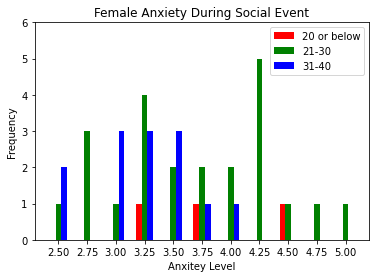

In [40]:
#create a bar graph showing frequency of females anxiety during

#list out all the values
timespent_list2 = female_duringdf.values.tolist()         
 
flat_list2 = []                                            
for sublist in timespent_list2:
    for item in sublist:
        flat_list2.append(item)

#changing list of ints into list of strs
flat_list2 = list(map(int, flat_list2))

N = 11
ind = np.arange(N)
width = 0.2
        
#creating the categories for each age group
f2_20below = flat_list2[0:11]
bar1 = plt.bar(ind, f2_20below, width, color = 'r')
                 
f2_21to30 = flat_list2[11:22]
bar2 = plt.bar(ind+width, f2_21to30, width, color='g')

f2_31to40 = flat_list2[22:]
bar3 = plt.bar(ind+width*2, f2_31to40, width, color = 'b')

plt.xlabel("Anxitey Level")
plt.ylabel('Frequency')
plt.title("Female Anxiety During Social Event")
  
plt.xticks(ind+width,['2.50', '2.75','3.00','3.25', '3.50', '3.75', '4.00', '4.25','4.50','4.75', '5.00'])
plt.legend( (bar1, bar2, bar3), ('20 or below', '21-30', '31-40') )

plt.ylim([0,6])

plt.show()

Text(0.5, 0.98, '')

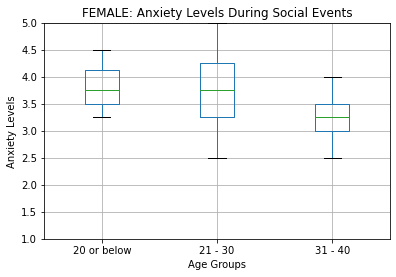

In [41]:
f_anxiety_during_bp = f_changesdf[['Age', 'Anxiety During']]                                         
f_anxiety_during_bp.boxplot(by = 'Age', column = 'Anxiety During')

plt.ylim([1.0, 5.0])

plt.title('FEMALE: Anxiety Levels During Social Events')
plt.xlabel('Age Groups')
plt.ylabel('Anxiety Levels')
plt.suptitle('')

Text(0.5, 0.98, '')

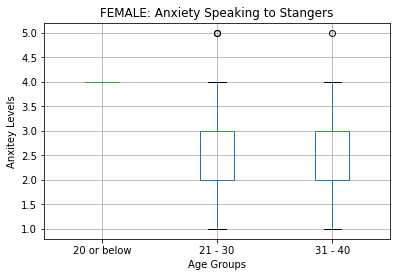

In [42]:
f_f2f_bp = f_changesdf[['Age', 'Q4']]
f_f2f_bp.boxplot(by = 'Age', column = 'Q4')

plt.title('FEMALE: Anxiety Speaking to Stangers')
plt.xlabel('Age Groups')
plt.ylabel('Anxitey Levels')
plt.suptitle('')

Graphs of anxitey level DURING social events for MALES

In [43]:
male_duringdf = m_changesdf[['Age', 'Anxiety During', 'Student']]

male_duringdf = male_duringdf.groupby(['Age', 'Anxiety During']).count().unstack(fill_value = 0).stack()

male_duringdf

Student
Age         Anxiety During         
20 or below 2.75                  1
            3.00                  1
            3.50                  0
            3.75                  0
            4.00                  0
            4.25                  0
            4.50                  1
            5.00                  0
21 - 30     2.75                  3
            3.00                  1
            3.50                  3
            3.75                  2
            4.00                  3
            4.25                  2
            4.50                  1
            5.00                  1
31 - 40     2.75                  2
            3.00                  2
            3.50                  2
            3.75                  1
            4.00                  1
            4.25                  0
            4.50                  0
            5.00                  0

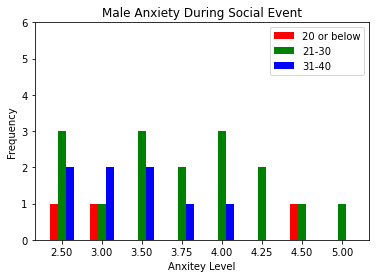

In [44]:
#create a bar graph showing frequency of females anxiety during

#list out all the values
timespent_list3 = male_duringdf.values.tolist()         
 
flat_list3 = []                                            
for sublist in timespent_list3:
    for item in sublist:
        flat_list3.append(item)

#changing list of ints into list of strs
flat_list3 = list(map(int, flat_list3))

N = 8
ind = np.arange(N)
width = 0.2
        
#creating the categories for each age group
m3_20below = flat_list3[0:8]
bar1 = plt.bar(ind, m3_20below, width, color = 'r')
                 
m3_21to30 = flat_list3[8:16]
bar2 = plt.bar(ind+width, m3_21to30, width, color='g')

m3_31to40 = flat_list3[16:]
bar3 = plt.bar(ind+width*2, m3_31to40, width, color = 'b')

plt.xlabel("Anxitey Level")
plt.ylabel('Frequency')
plt.title("Male Anxiety During Social Event")
  
plt.xticks(ind+width,['2.50','3.00', '3.50', '3.75', '4.00', '4.25','4.50', '5.00'])
plt.legend((bar1, bar2, bar3), ('20 or below', '21-30', '31-40') )

plt.ylim([0,6]) 

plt.show()

Text(0.5, 0.98, '')

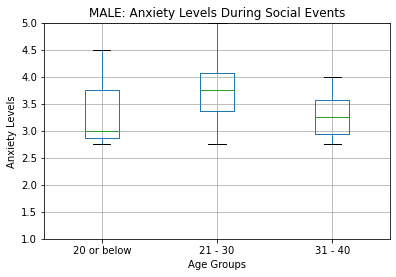

In [45]:
m_anxiety_during_bp = m_changesdf[['Age', 'Anxiety During']]                                         
m_anxiety_during_bp.boxplot(by = 'Age', column = 'Anxiety During')

plt.ylim([1.0, 5.0])

plt.title('MALE: Anxiety Levels During Social Events')
plt.xlabel('Age Groups')
plt.ylabel('Anxiety Levels')
plt.suptitle('')